Total images 2892
33


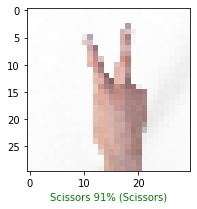

214


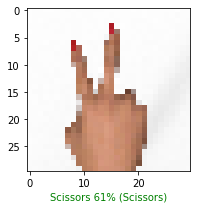

251


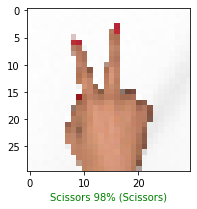

50


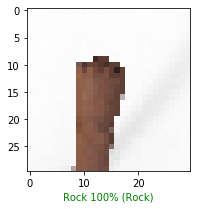

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import cv2

from tensorflow import keras

# Load json and create model
file = open('/Users/lorenzolaino/llDev/intelligent_systems/prova.json', 'r')
json_model = file.read()
file.close()

loaded_model = keras.models.model_from_json(json_model)
# Load weights
loaded_model.load_weights('/Users/lorenzolaino/llDev/intelligent_systems/prova_weights.hdf5')

# Process the data
train_ds, test_ds = tfds.load('rock_paper_scissors', split = ['train', 'test'], as_supervised = True)

train_ds = tfds.as_numpy(train_ds)
test_ds = tfds.as_numpy(test_ds)

def create_img_label_set(data_set, dimension):
    image_set = []
    label_set = []
    for img in data_set:
        image, label = img[0], img[1]
        res_img = cv2.resize(image, dsize = (dimension ,dimension), interpolation = cv2.INTER_CUBIC)
        image_set.append(res_img)
        label_set.append(label)
    return np.asarray(image_set), np.asarray(label_set)

img_train, label_train = create_img_label_set(train_ds, 30)
img_test, label_test = create_img_label_set(test_ds, 30)
print('Total images', img_train.shape[0] + img_test.shape[0])

# Make predictions
class_names = ['Rock', 'Paper', 'Scissors']

predictions = loaded_model.predict(img_test)

def plot_image(i):
    img = img_test[i]
    predicted = predictions[i]
    label = label_test[i]

    predicted_label = np.argmax(predicted)
    color = 'red' if predicted_label != label else 'green'

    plt.imshow(img, cmap = plt.cm.binary)
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 100*np.max(predicted), class_names[label]), color = color)

for i in range(0, 4):
    rand = np.random.randint(0, len(img_test))
    print(rand)
    plt.figure(figsize = (6, 3))
    plot_image(rand)
    plt.show()
